# Exploratory Data Analysis (EDA)

## Dunes Store

In [2]:
!pip install missingno

In [3]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing dataset
df=pd.read_csv(r"C:\Users\GANIYU LATEEF GBADEB\Downloads\Dune Sales Data - Dune Sales Data.csv")
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [5]:
df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [8]:
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [9]:
df.describe(include=['object','bool'])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


### Dealing with missing data

In [10]:
# Investigating missing values

null_vals=df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

<AxesSubplot:>

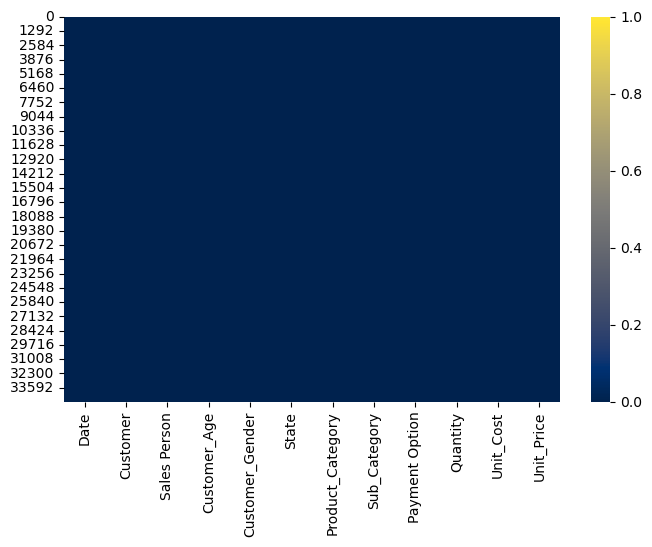

In [11]:
# Visualize the missing data
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=True, cmap='cividis')

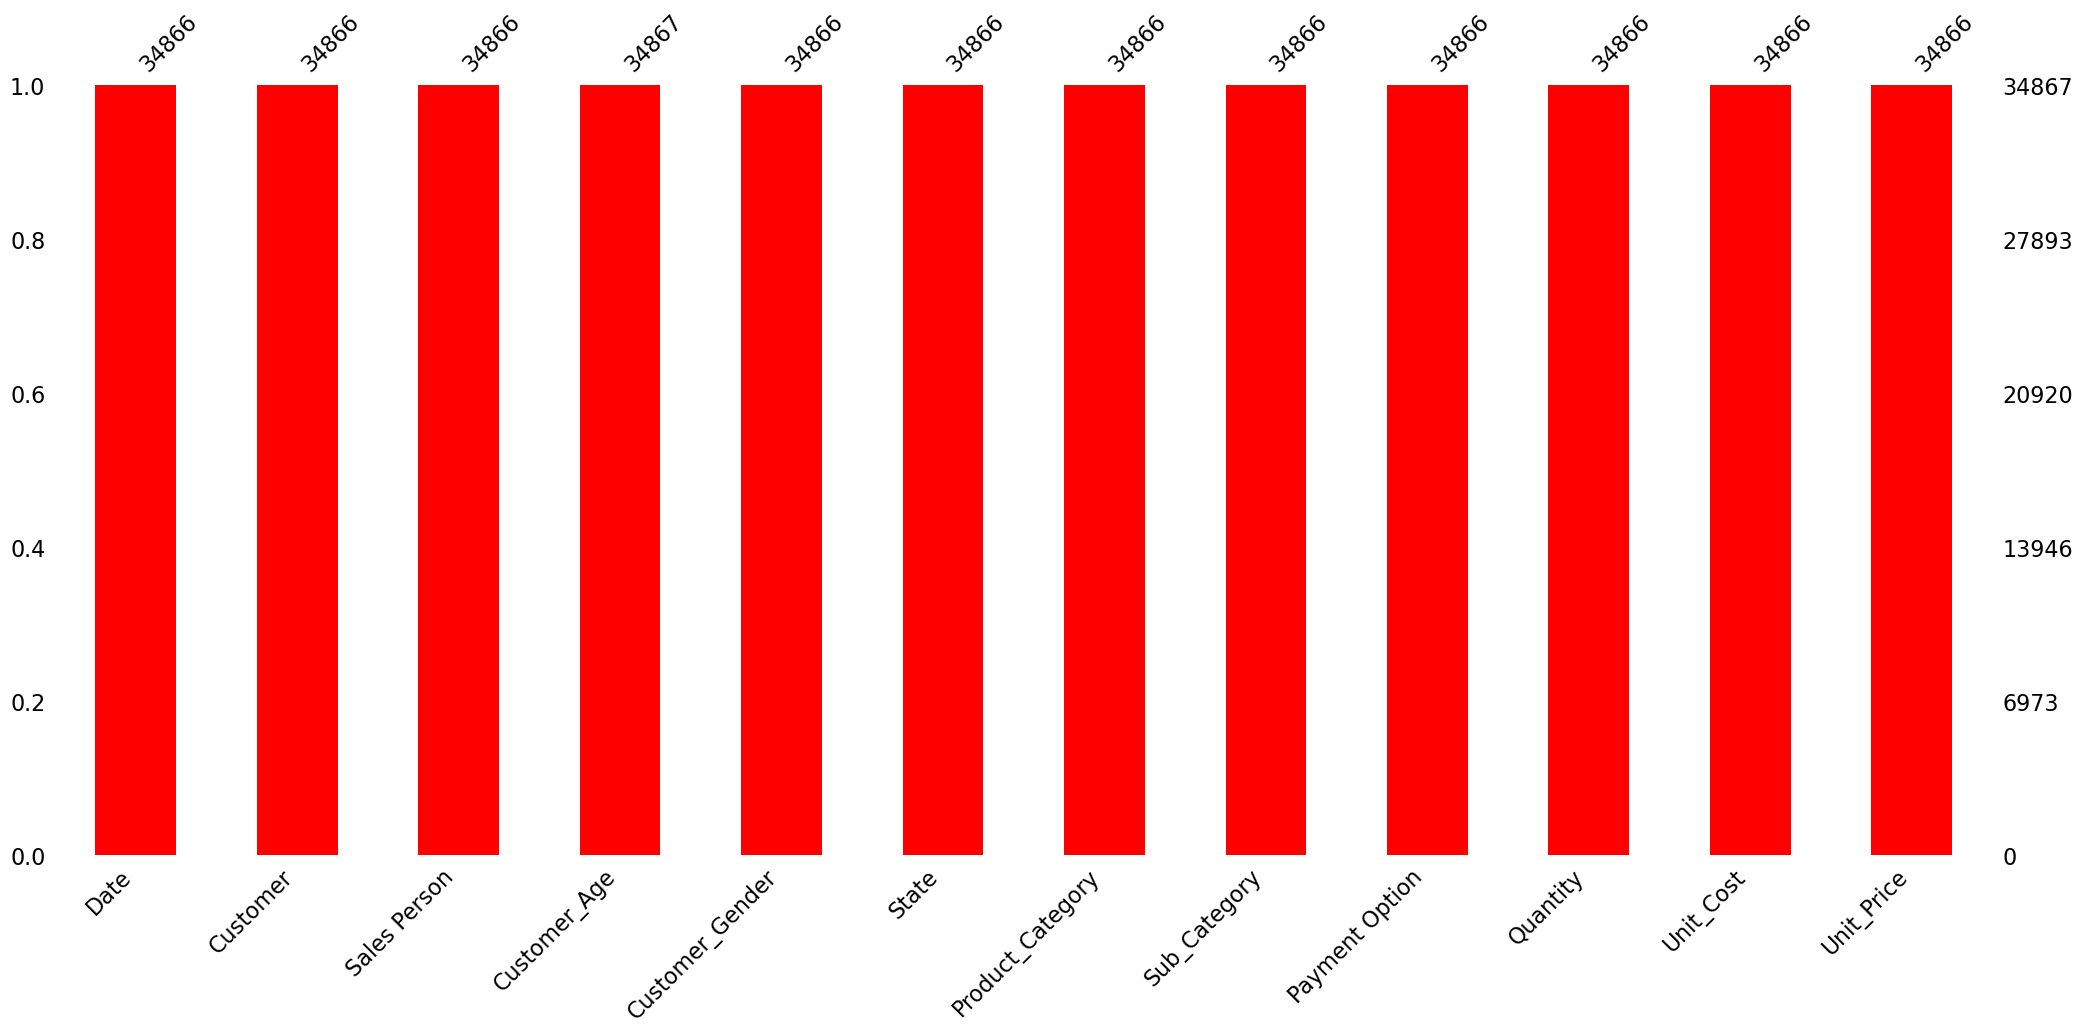

In [12]:
msno.bar(df, color='red');

In [13]:
# Display where the missing data exists
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Drop the missing data
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

### Date Time Analysis

In [16]:
# convert the date column into a panda datetime object
df['Date']=pd.to_datetime(df['Date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


In [18]:
# Extract the year, month, quarter
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['month_name']=df['Date'].dt.month_name()
df['quarter']=df['Date'].dt.quarter

In [19]:
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


### Grouping Customer Age

In [20]:
# create function#
def age_group(x):
    if x <= 25:
        return '<= 25 Young Adult'
    elif x <= 40:
        return '25 - 40 Adult'
    elif x<=50:
        return '40 - 50 Old Adult'
    else:
        return '51> Elders'
    
# Apply function to the data
df['age_group']= df['Customer_Age'].apply(age_group)
df.head()
        

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,25 - 40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,25 - 40 Adult
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,25 - 40 Adult
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,25 - 40 Adult
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,25 - 40 Adult


### Cost, Revenue and Profit Calculations

In [21]:
df['Cost']= df['Quantity'] * df['Unit_Cost']
df['Revenue']= df['Quantity'] * df['Unit_Price']
df['Profit']= df['Revenue'] - df['Cost']
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group,Cost,Revenue,Profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,25 - 40 Adult,80.00,109.00,29.00
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,25 - 40 Adult,49.00,57.00,8.00
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,25 - 40 Adult,11.01,15.00,3.99
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,25 - 40 Adult,175.00,233.00,58.00
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,25 - 40 Adult,105.00,125.01,20.01


In [22]:
# Profit/loss grouping
def porl(x):
    if x>= 0:
        return 'Profit'
    else:
        return 'Loss'

# Apply function
df['Profit_Label']=df['Profit'].apply(porl)
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,Cost,Revenue,Profit,Profit_Label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.00,2016,2,February,1,25 - 40 Adult,80.00,109.00,29.00,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.50,2016,2,February,1,25 - 40 Adult,49.00,57.00,8.00,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.00,2016,2,February,1,25 - 40 Adult,11.01,15.00,3.99,Profit
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,116.50,2016,3,March,1,25 - 40 Adult,175.00,233.00,58.00,Profit
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,41.67,2016,3,March,1,25 - 40 Adult,105.00,125.01,20.01,Profit


### Univariate Analysis

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
 12  year              34866 non-null  int64         
 13  month             34866 non-null  int64         
 14  month_name        3486

In [24]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

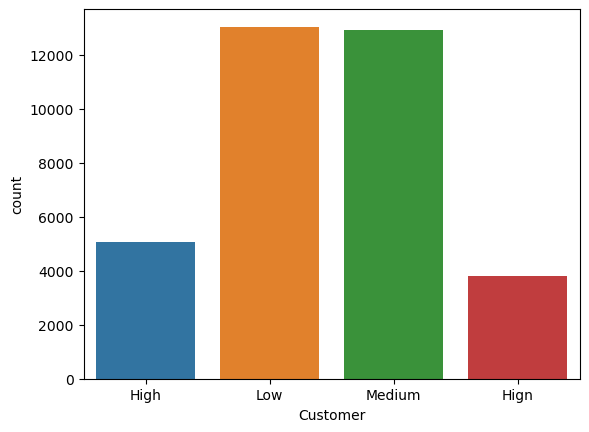

In [25]:
# Customer spec
sns.countplot(df['Customer']);

In [26]:
# Investigate the columns affected
df[df['Customer']== 'Hign'].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,Cost,Revenue,Profit,Profit_Label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,25 - 40 Adult,2295.00,2136.00,-159.0,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,25 - 40 Adult,35.00,39.00,4.0,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,25 - 40 Adult,50.01,56.01,6.0,Profit


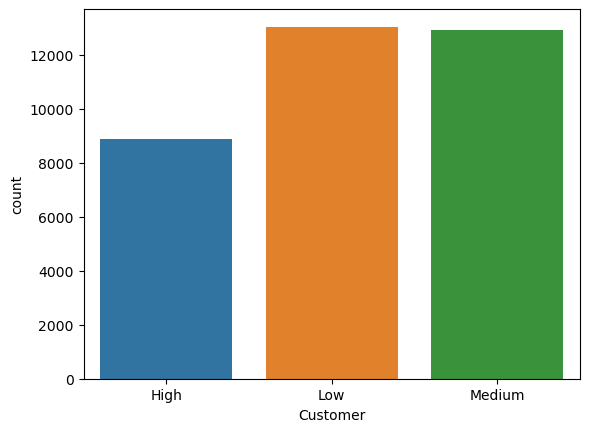

In [27]:
# Replace hign to high
df.loc[df['Customer']=='Hign','Customer']= 'High'
sns.countplot(df['Customer']);


In [28]:
df['Customer'].value_counts()

Low       13041
Medium    12926
High       8899
Name: Customer, dtype: int64

- Low Customer have the highiest trransaction with a value of 13041

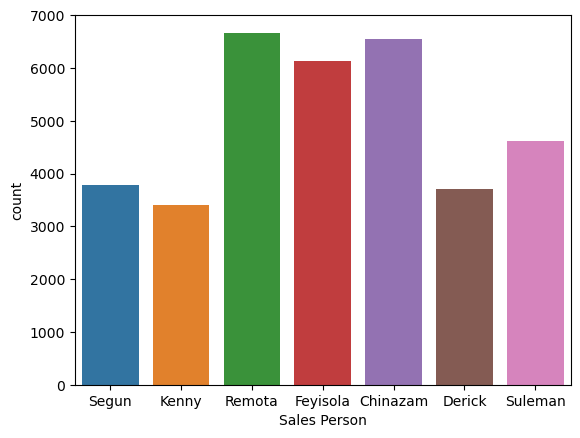

In [29]:
# Transaction by each sales person
sns.countplot(df['Sales Person']);

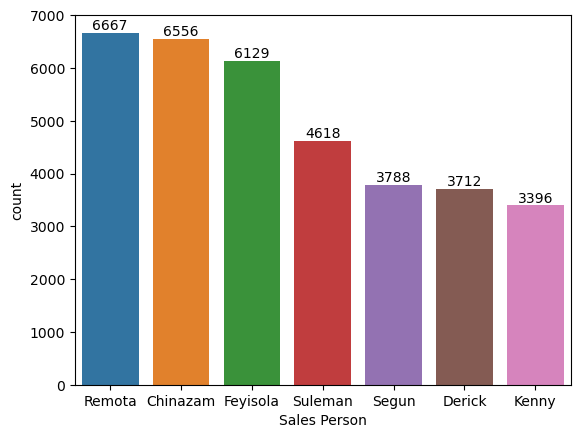

In [30]:
ax=sns.countplot(x=df['Sales Person'], order=df['Sales Person'].value_counts(ascending=False).index)
values=df['Sales Person'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

- Sales Person Remota recorded the highest trasanction number 6667 while sales person Kenny recorded the lowest transaction number 3396

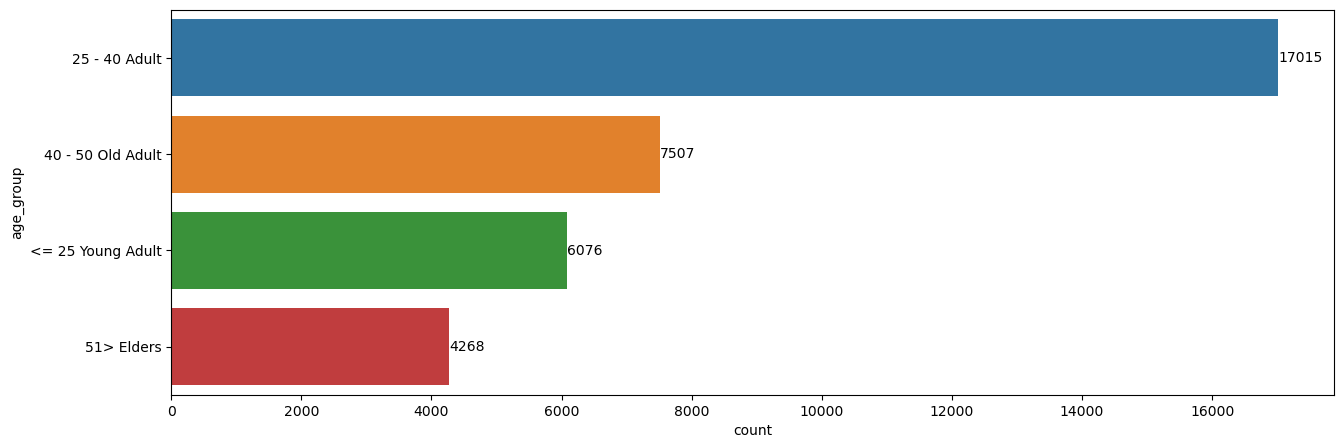

In [31]:
plt.figure(figsize=(15,5))
ax=sns.countplot(y=df['age_group'], order=df['age_group'].value_counts(ascending=False).index)
values=df['age_group'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

- The highest amount of tranasctions are coming from Adult of age 25 - 40

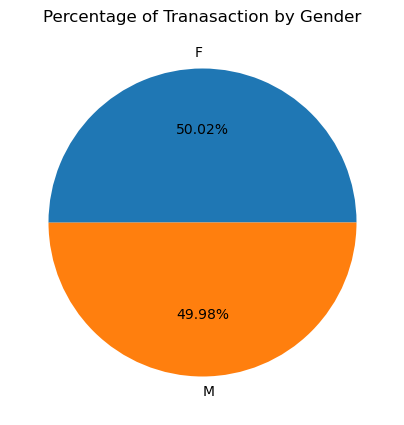

In [32]:
# Total Transaction by customer Gender
fig,ax= plt.subplots(figsize=(5,5))
count = Counter(df['Customer_Gender'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of Tranasaction by Gender')
plt.show();

- There is a relative balance in the trasaction done by Gender

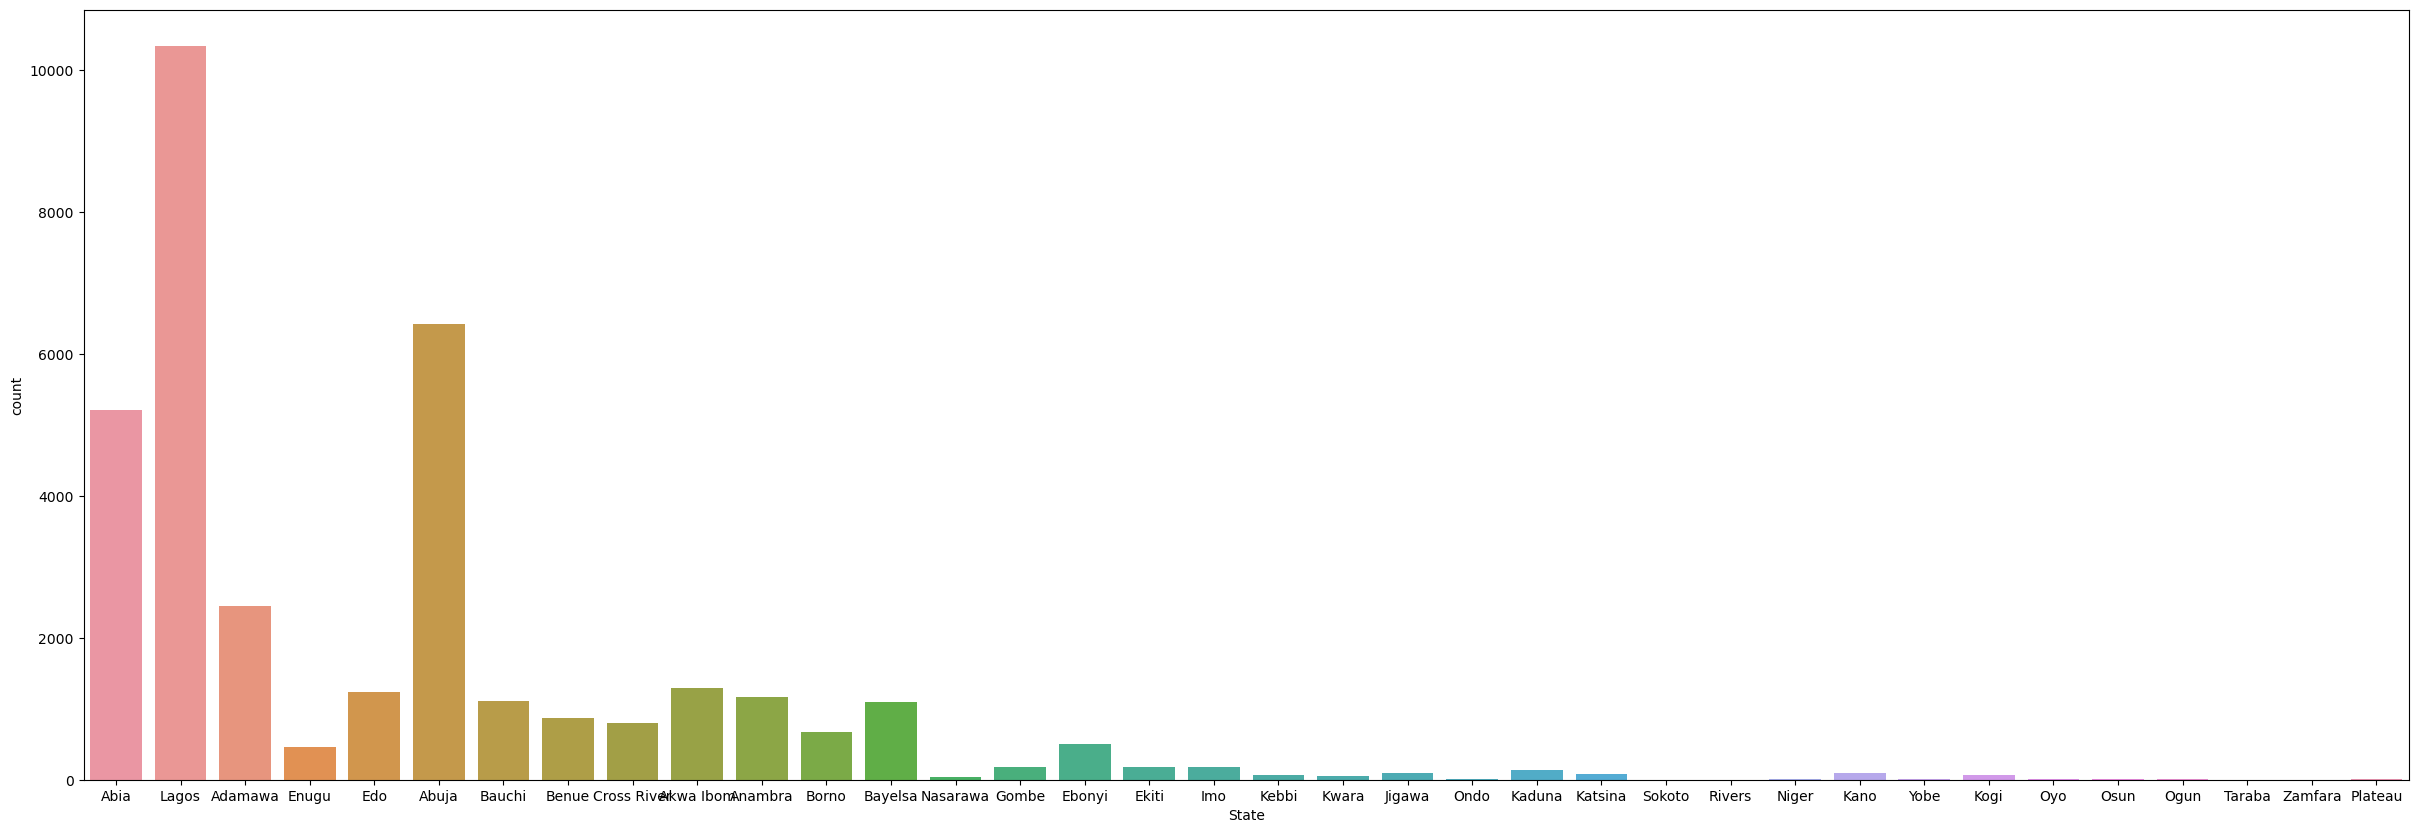

In [33]:
# Total transaction by state
plt.figure(figsize=(30,10))
sns.countplot(df['State']);

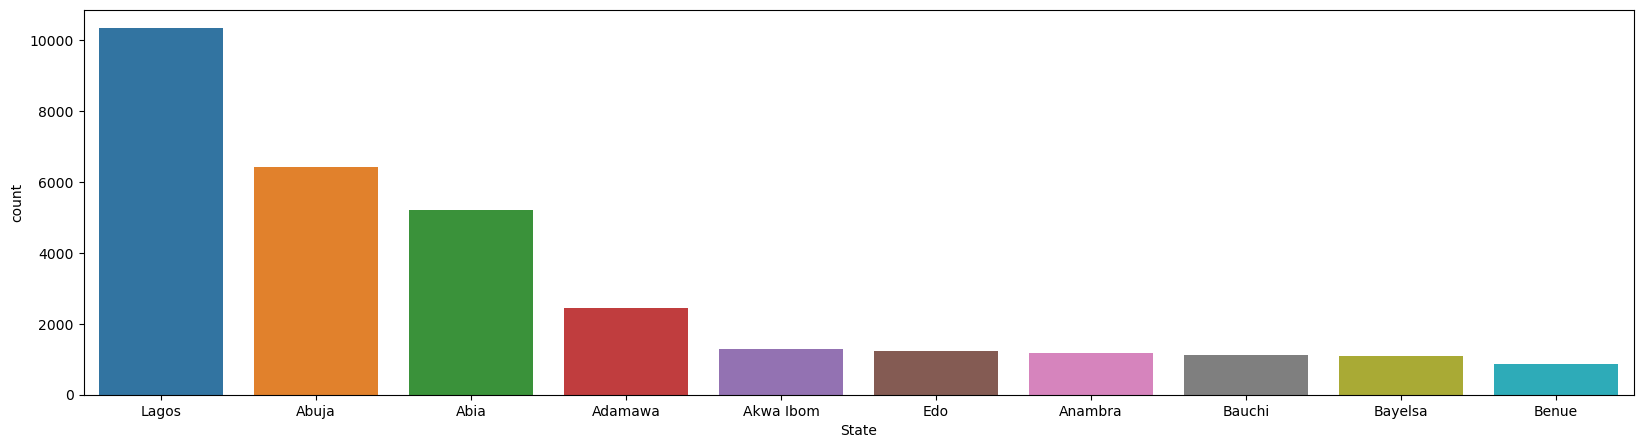

In [34]:
# Top 10 transaction by state
plt.figure(figsize=(20,5))
topten=df['State'].value_counts().head(10)
sns.countplot(x='State', data=df, order=topten.index);

- The above visualization contains the ten states where the most transactions are carried out

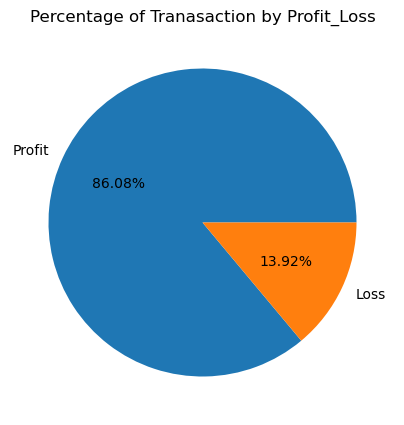

In [35]:
# Total Transaction  of profit or loss
fig,ax= plt.subplots(figsize=(5,5))
count = Counter(df['Profit_Label'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of Tranasaction by Profit_Loss')
plt.show();

- There is an overall profit of 86.08% of all transactions carried out 

In [36]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

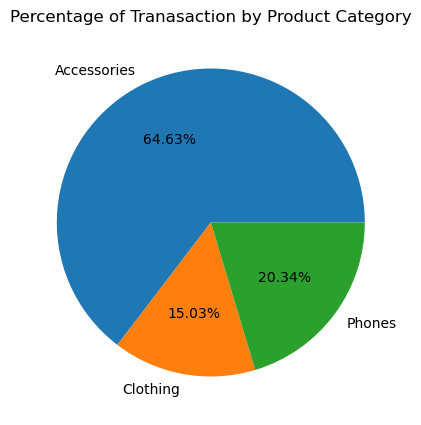

In [37]:
# Total transaction by product category
fig,ax= plt.subplots(figsize=(5,5))
count = Counter(df['Product_Category'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of Tranasaction by Product Category')
plt.show();

- A 64.63% of transactions is carried out under the Accessories Product Category. 

[Text(0, 0, '11112'),
 Text(0, 0, '5295'),
 Text(0, 0, '4176'),
 Text(0, 0, '3022'),
 Text(0, 0, '2737'),
 Text(0, 0, '2000'),
 Text(0, 0, '1517'),
 Text(0, 0, '1334'),
 Text(0, 0, '762'),
 Text(0, 0, '566'),
 Text(0, 0, '545'),
 Text(0, 0, '480'),
 Text(0, 0, '396'),
 Text(0, 0, '364'),
 Text(0, 0, '312'),
 Text(0, 0, '145'),
 Text(0, 0, '103')]

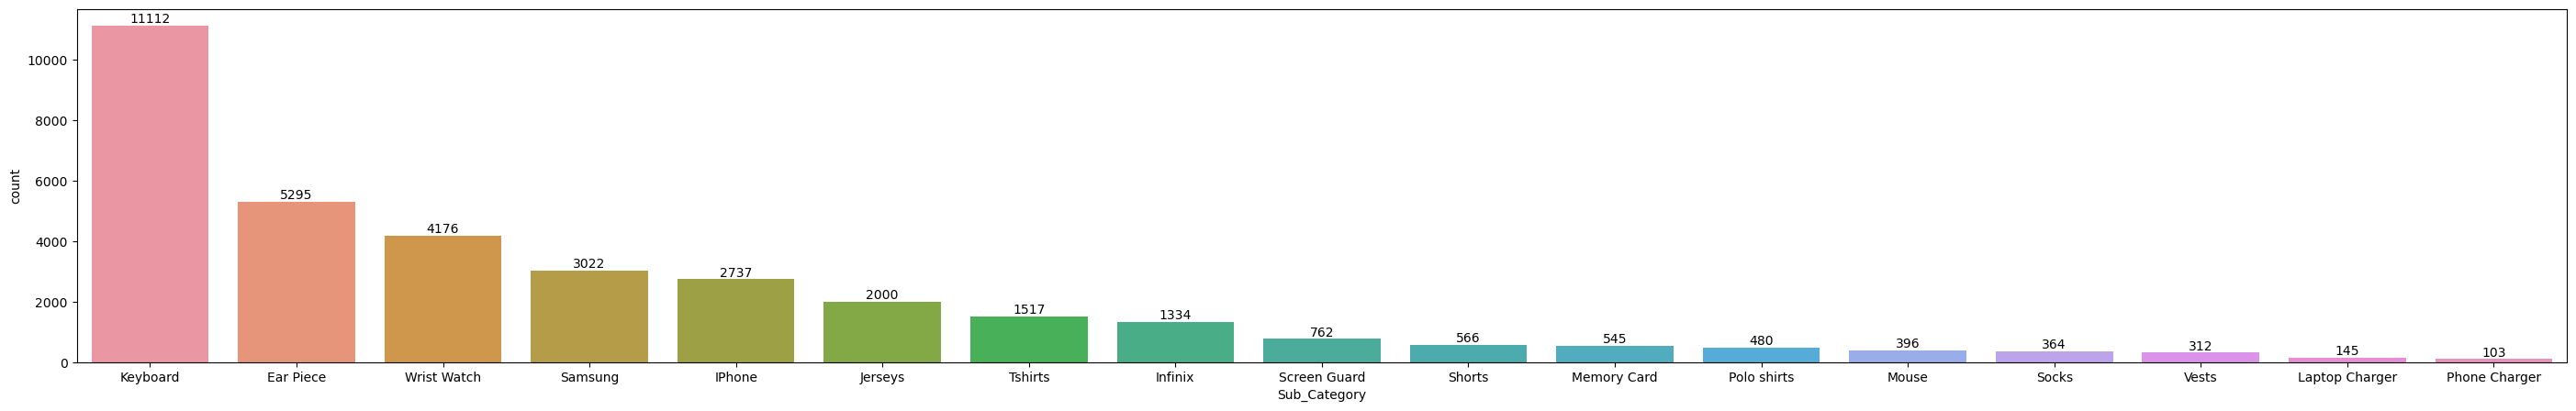

In [38]:
#Total transaction by sub category
plt.figure(figsize=(35,5))
ax=sns.countplot(x=df['Sub_Category'], order=df['Sub_Category'].value_counts(ascending=False).index)
values=df['Sub_Category'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)

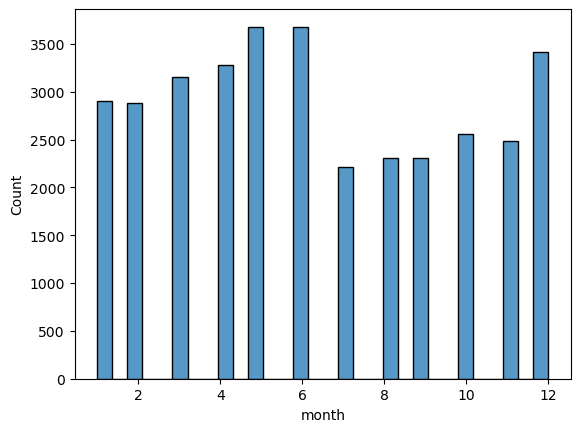

In [39]:
# Distribution of Quanity
sns.histplot(x='month', data=df);

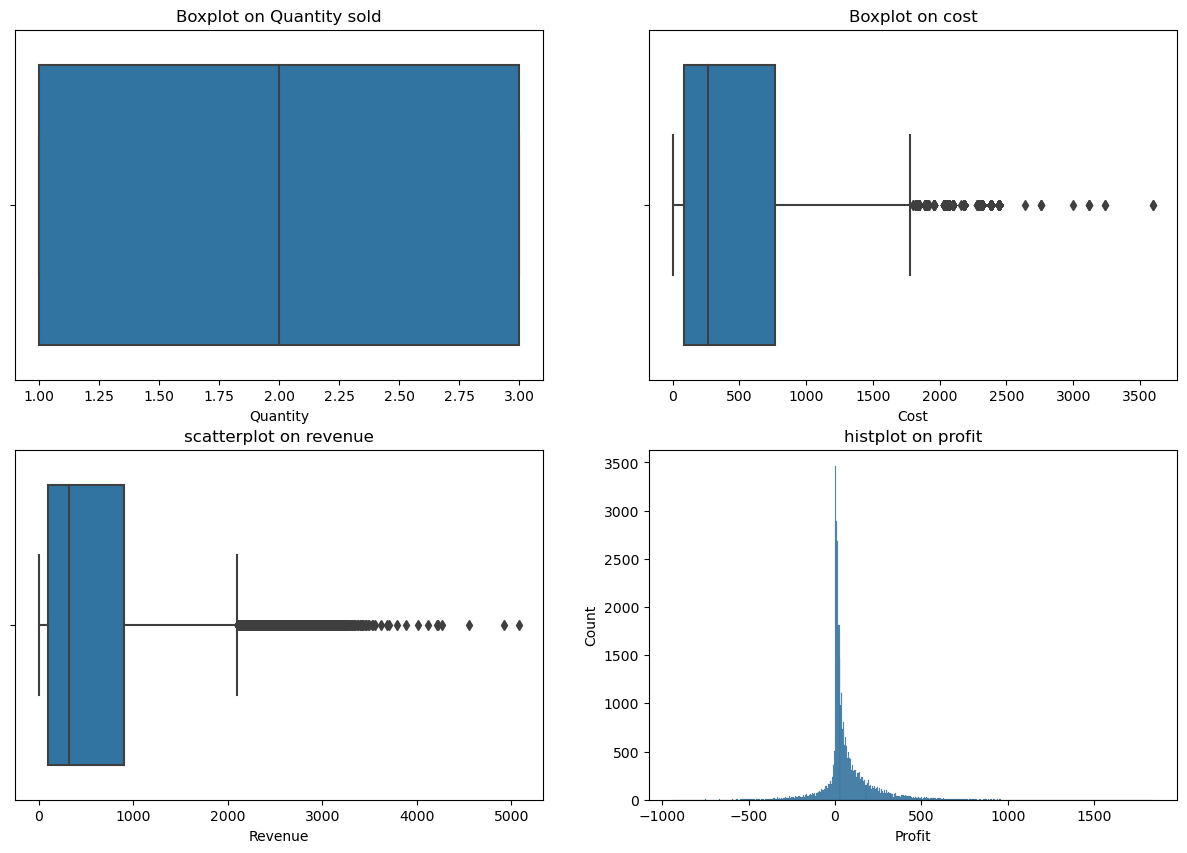

In [40]:
# Quantity, Cost, Revenue and profit - Subplot
fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x='Quantity', data=df, ax=axs[0,0])
axs[0,0].set_title('Boxplot on Quantity sold')

sns.boxplot(x='Cost', data=df, ax=axs[0,1])
axs[0,1].set_title('Boxplot on cost')

sns.boxplot(x='Revenue', data=df, ax=axs[1,0])
axs[1,0].set_title('scatterplot on revenue')

sns.histplot(x='Profit', data=df, ax=axs[1,1])
axs[1,1].set_title('histplot on profit');

### BIVARIATE ANALYSIS

- Relationship between two variables

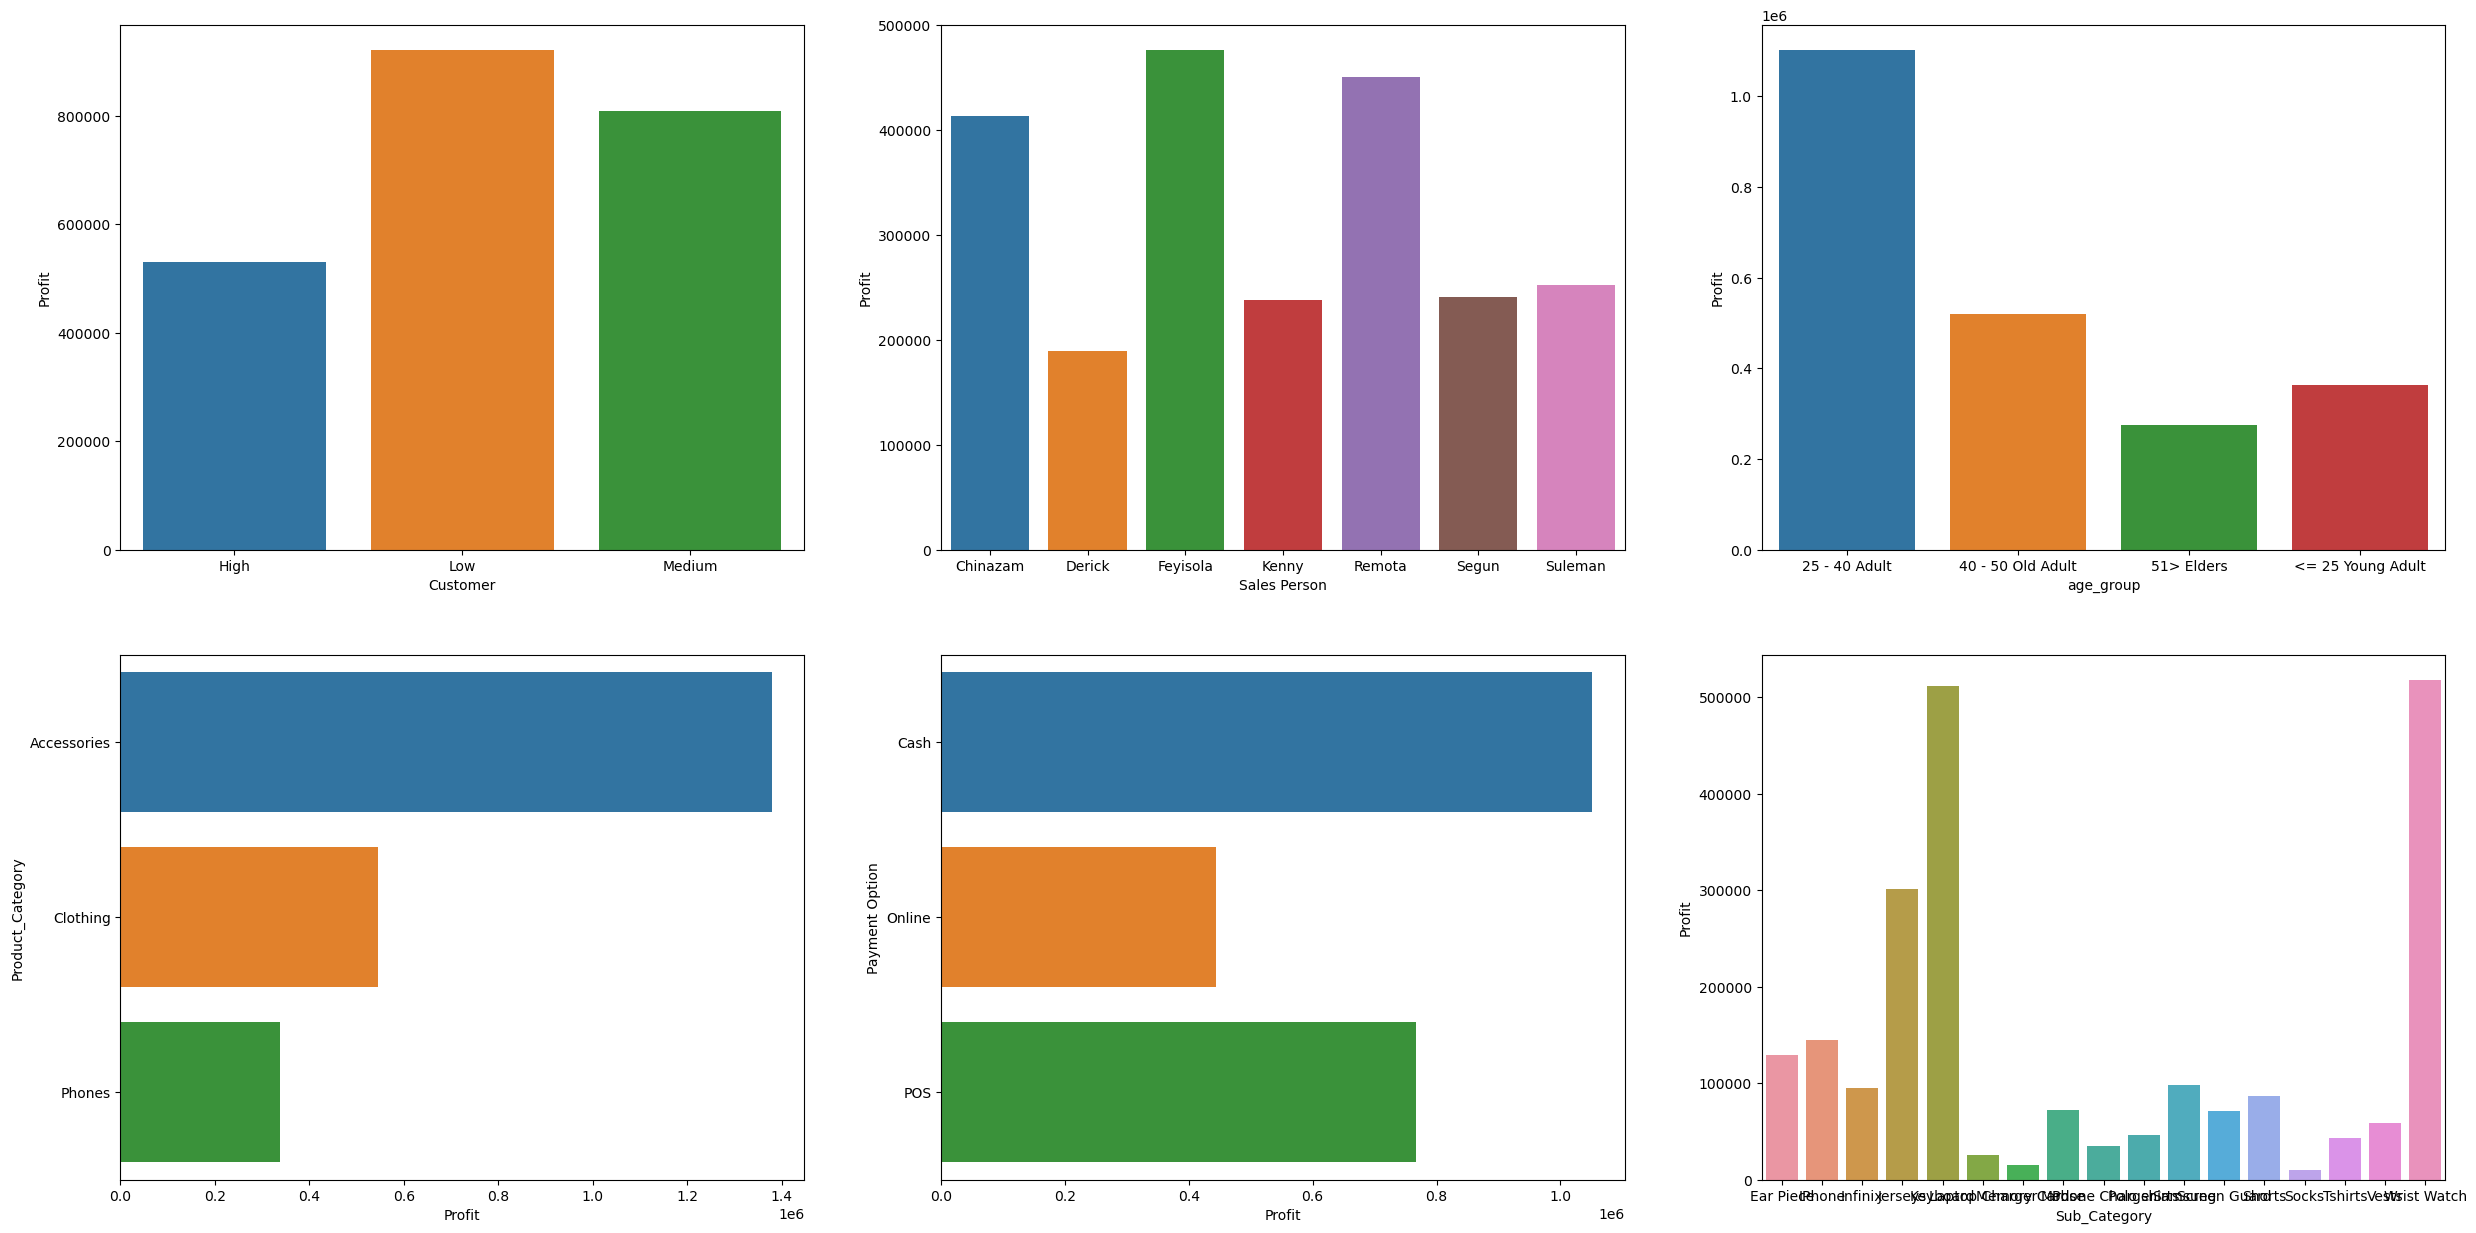

In [41]:
fig,axs=plt.subplots(nrows=2, ncols=3,figsize=(30,15))

Cust_prof= df.groupby('Customer')['Profit'].sum().reset_index()
sns.barplot(x='Customer', data=Cust_prof, y='Profit', ax=axs[0,0])

SP_prof= df.groupby('Sales Person')['Profit'].sum().reset_index()
sns.barplot(x='Sales Person', data=SP_prof, y='Profit', ax=axs[0,1])

AG_prof= df.groupby('age_group')['Profit'].sum().reset_index()
sns.barplot(x='age_group', data=AG_prof, y='Profit', ax=axs[0,2])

PC_prof= df.groupby('Product_Category')['Profit'].sum().reset_index()
sns.barplot(y='Product_Category', data=PC_prof, x='Profit', ax=axs[1,0])

PO_prof= df.groupby('Payment Option')['Profit'].sum().reset_index()
sns.barplot(y='Payment Option', data=PO_prof, x='Profit', ax=axs[1,1])

SC_prof= df.groupby('Sub_Category')['Profit'].sum().reset_index()
sns.barplot(x='Sub_Category', data=SC_prof, y='Profit', ax=axs[1,2]);

In [42]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

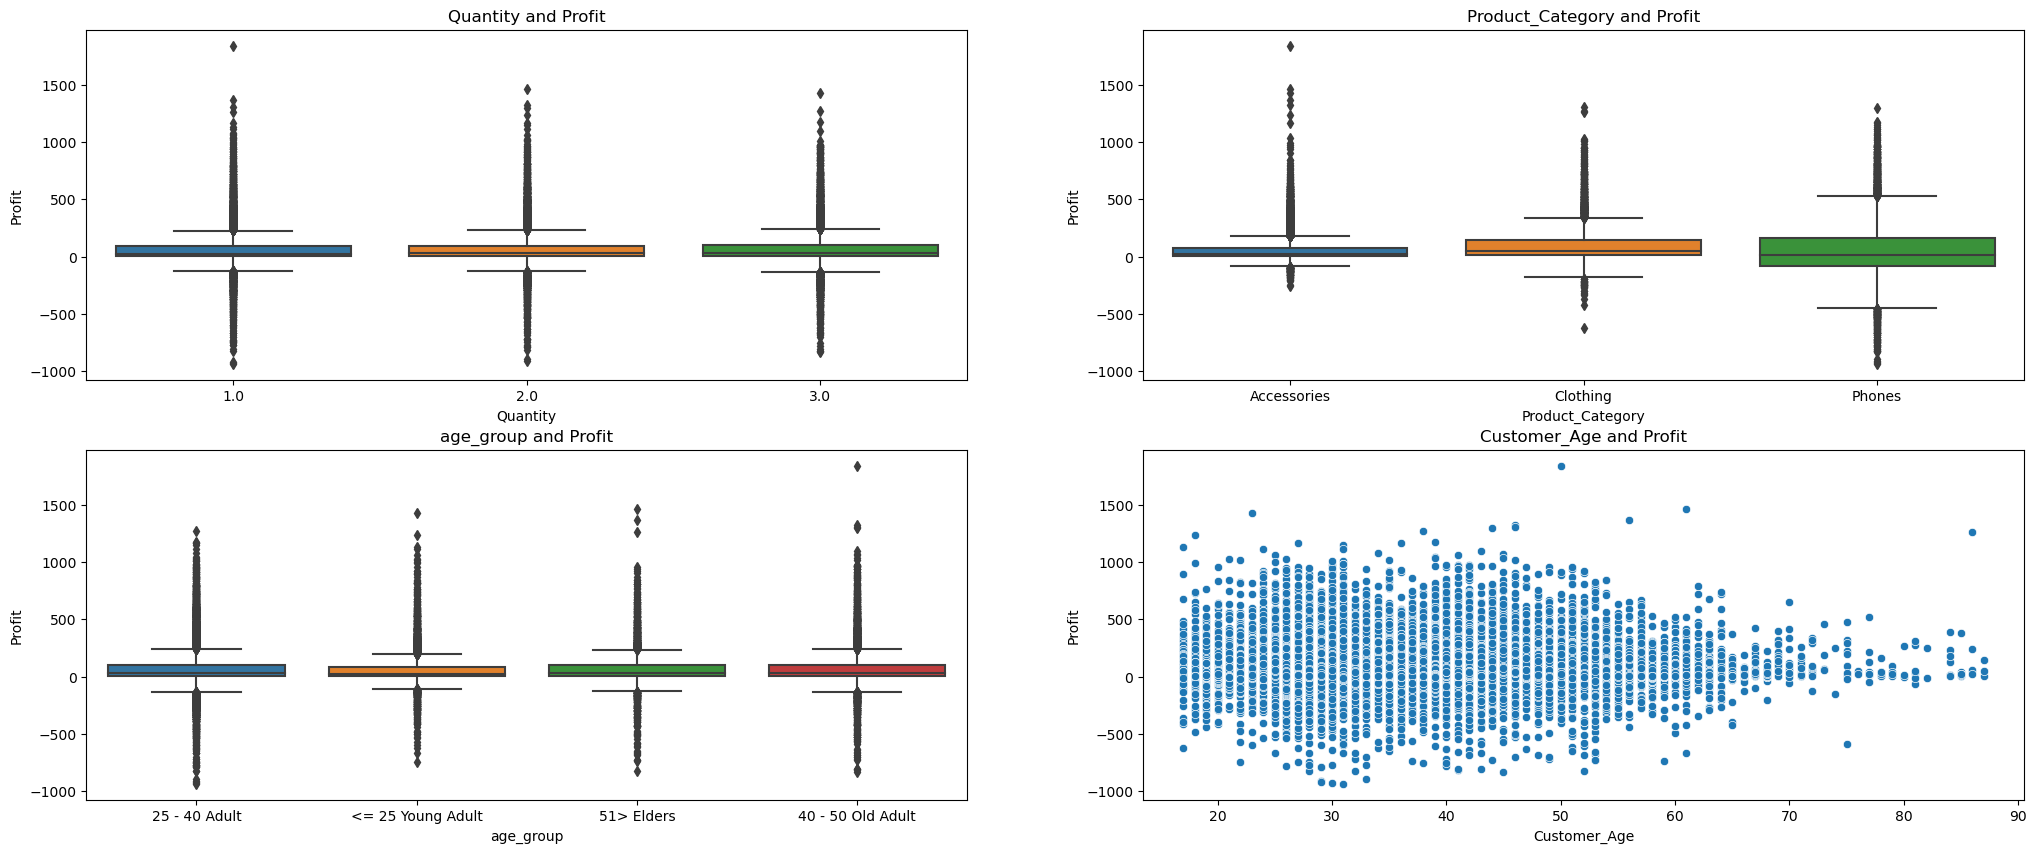

In [43]:
# Numerical Clumns

fig,axs= plt.subplots(nrows=2, ncols=2, figsize=(25,10))

sns.boxplot(x='Quantity', y='Profit', data=df, ax= axs[0,0])
axs[0,0].set_title('Quantity and Profit')

sns.boxplot(x='Product_Category', y='Profit', data=df, ax= axs[0,1])
axs[0,1].set_title('Product_Category and Profit')


sns.boxplot(x='age_group', y='Profit', data=df, ax= axs[1,0])
axs[1,0].set_title('age_group and Profit')

sns.scatterplot(x='Customer_Age', y='Profit', data=df, ax= axs[1,1])
axs[1,1].set_title('Customer_Age and Profit');

### Multivariate Analysis

##### Multivariate analysis involves analyzing the relationship between three or variables.

<AxesSubplot:xlabel='Product_Category', ylabel='Total'>

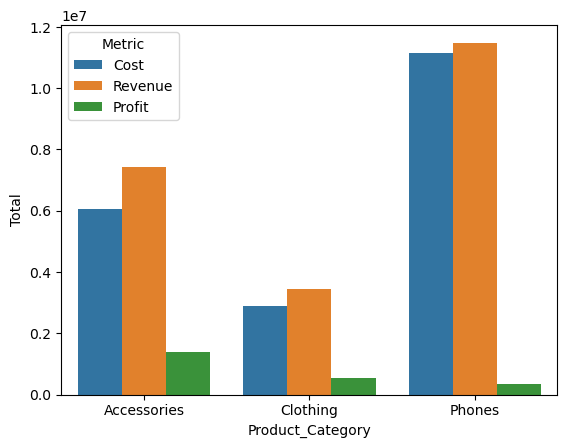

In [44]:
# Product Category against Cost, Revenue and Profit

procat = df.groupby('Product_Category')[['Cost','Revenue','Profit']].sum().reset_index()
procat = pd.melt(procat, id_vars='Product_Category', var_name='Metric', value_name='Total')
sns.barplot(data=procat, x='Product_Category', y='Total', hue='Metric')

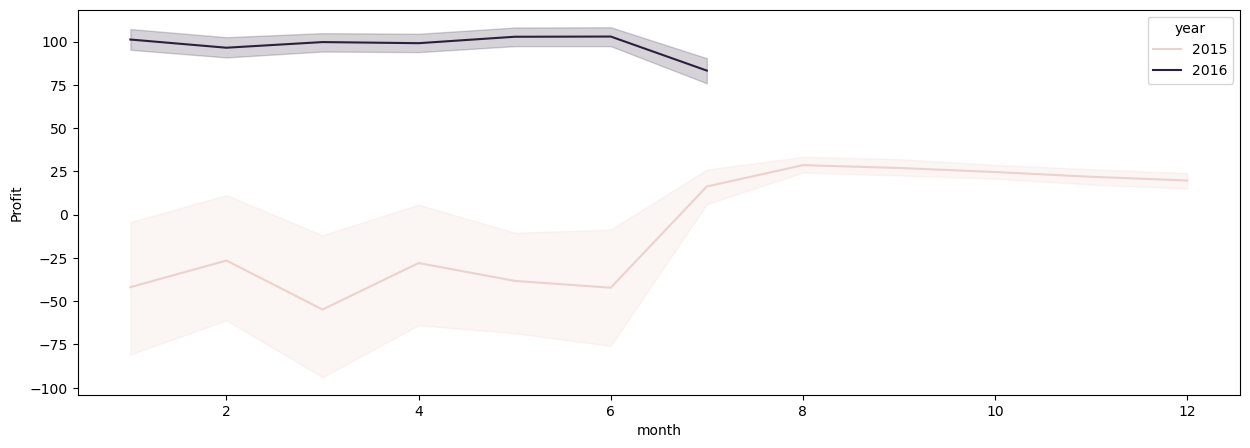

In [45]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='Profit', data=df, hue='year');

In [46]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

In [47]:
# Using a pivot table
df.pivot_table(values='Profit', index='year', columns='month', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


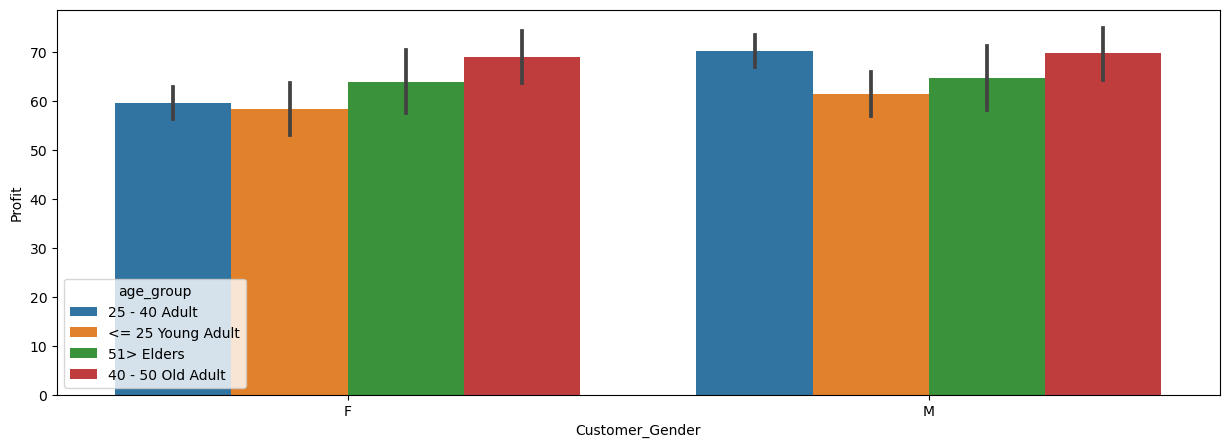

In [48]:
# Customer Gender, Age group and Profit
plt.figure(figsize=(15,5))
sns.barplot(x='Customer_Gender', y= 'Profit', data=df, hue='age_group');

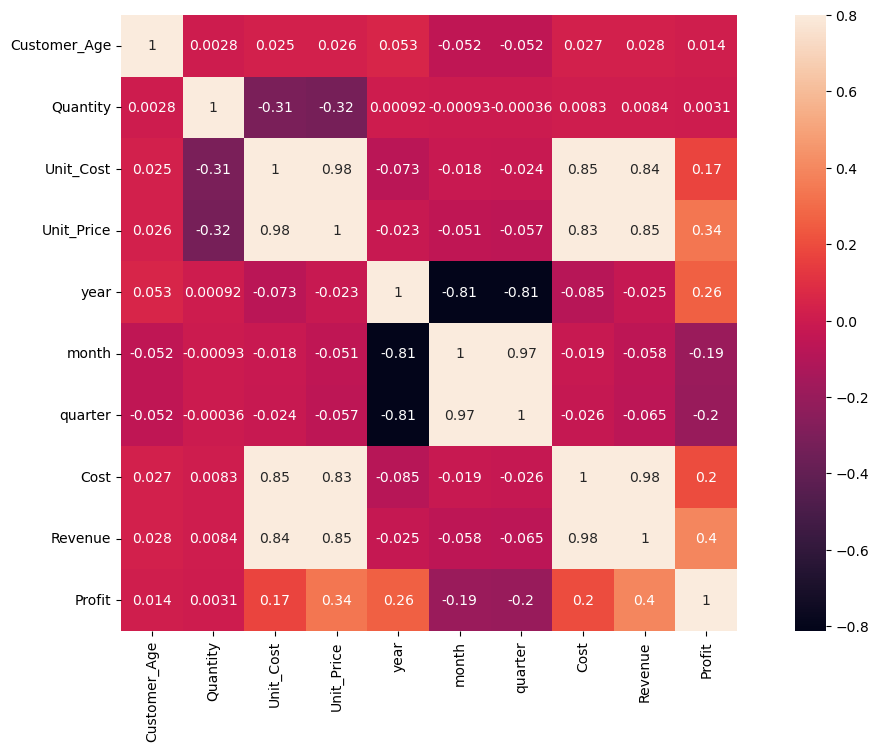

In [51]:
#correlation
a = df.corr()
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(a, vmax=.8, square=True, annot=True);

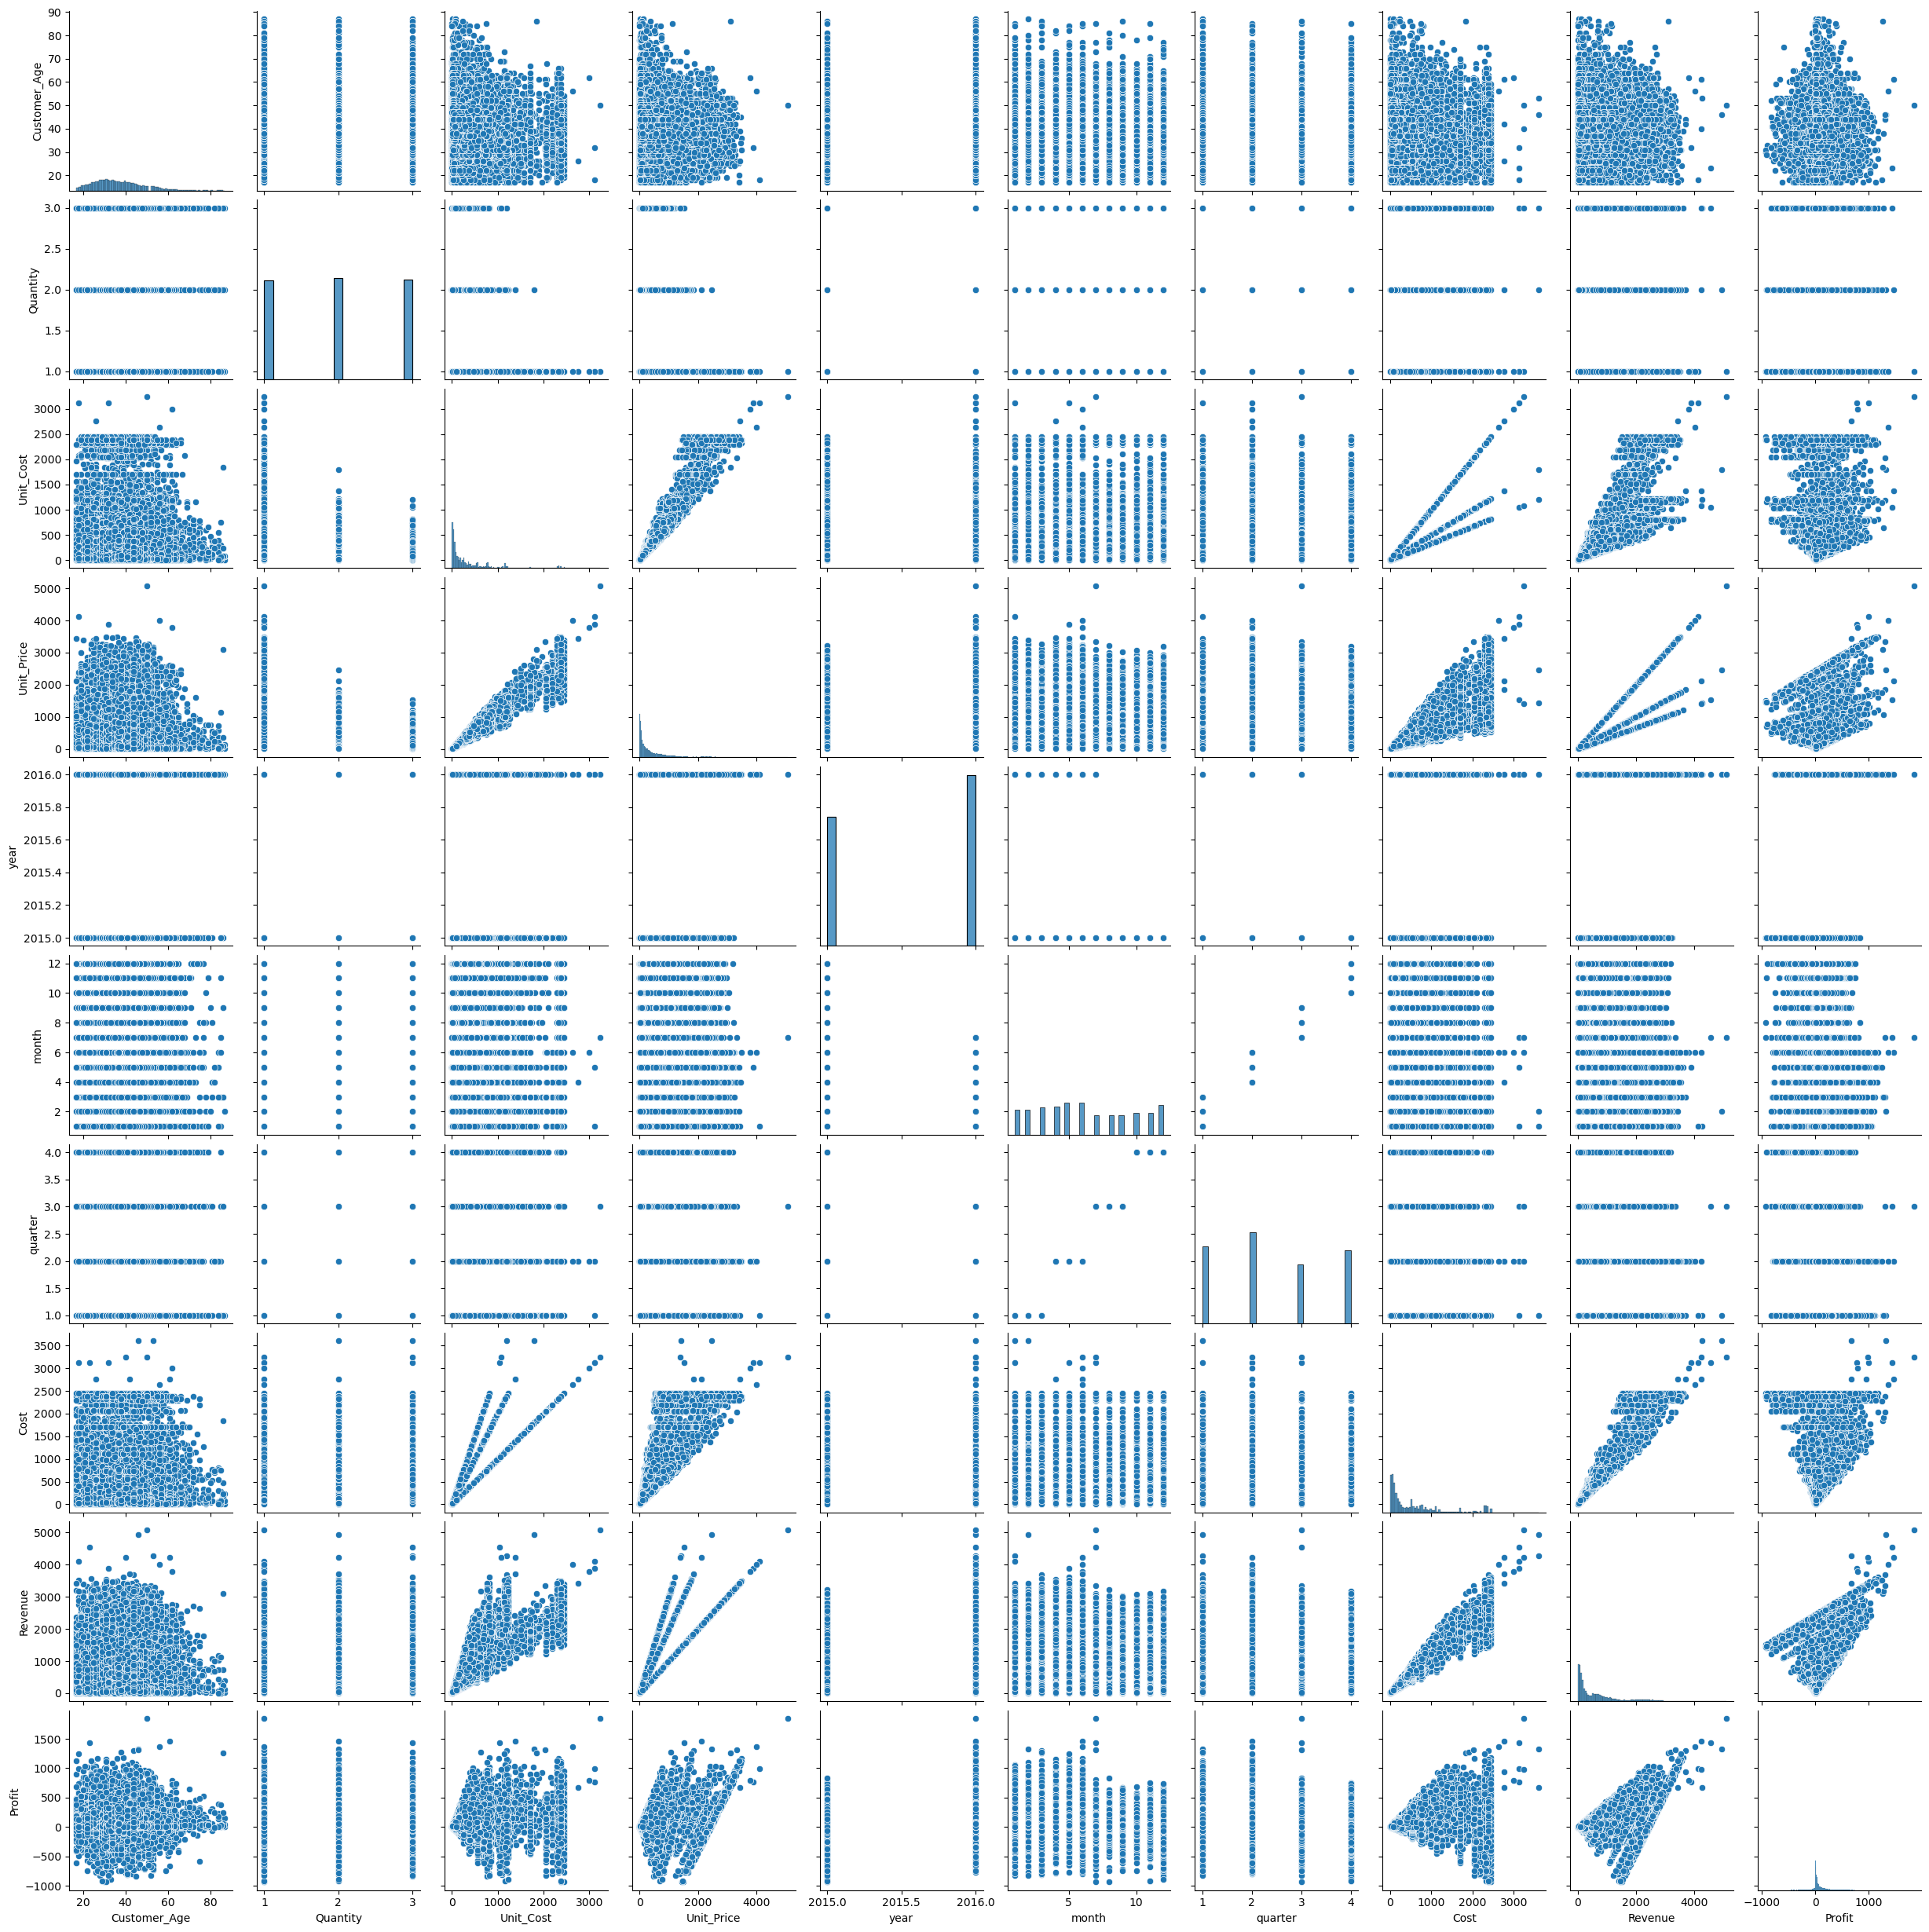

In [52]:
sns.pairplot(df, size=2.5);